# MScFE 632 - Group Project 1
### Machine Learning in Finance
---

In [ ]:

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LassoCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression, make_blobs, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, silhouette_score

sns.set(style="whitegrid")
%matplotlib inline


# **Lasso Regression**

**Computation (Python - sklearn):**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict
y_pred = lasso.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("Number of selected features:", sum(lasso.coef_ != 0))


MSE: 0.11867641198720265
Number of selected features: 10


# **K-Means Clustering**

**Computation**

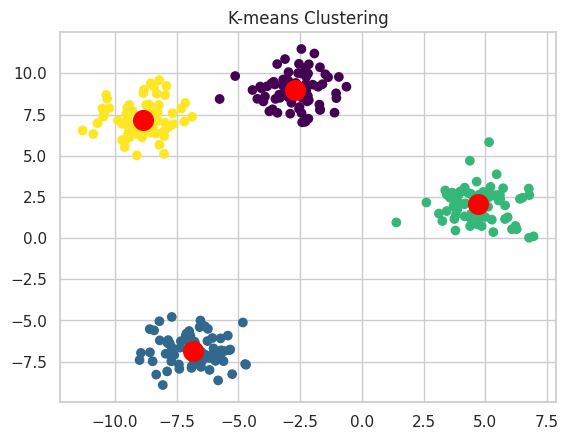

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("K-means Clustering")
plt.show()


# **Principal Component Analysis**

**Computation**

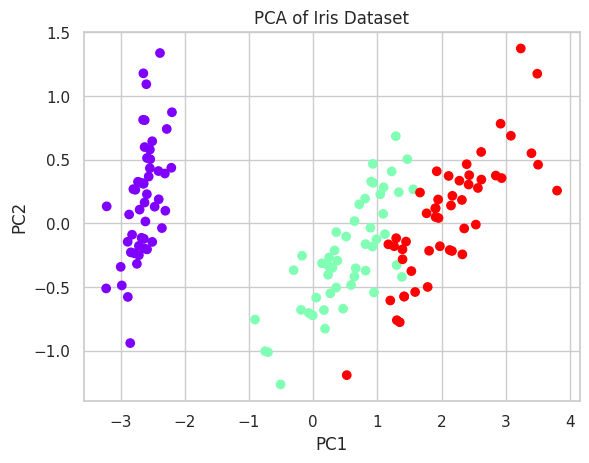

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load data
data = load_iris()
X = data.data

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target, cmap='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Iris Dataset")
plt.show()


## **LASSO Regression – Hyperparameter tuning & Visualization**

Optimal alpha: 0.006551285568595509
Test MSE: 0.0148
Selected Features: 16


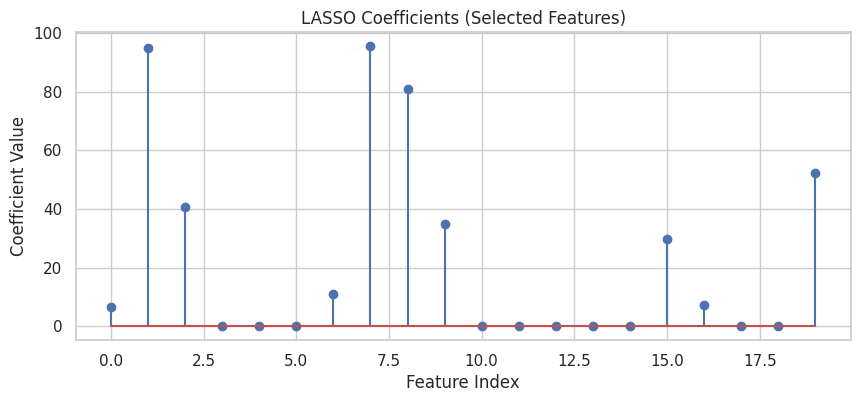

In [ ]:
# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation for alpha tuning
alphas = np.logspace(-3, 1, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
selected_features = np.sum(lasso_cv.coef_ != 0)

print(f"Optimal alpha: {lasso_cv.alpha_}")
print(f"Test MSE: {mse:.4f}")
print(f"Selected Features: {selected_features}")

# Plot coefficient values
plt.figure(figsize=(10, 4))
plt.stem(lasso_cv.coef_)
plt.title("LASSO Coefficients (Selected Features)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()

## K-means Clustering – Elbow & Silhouette Analysis

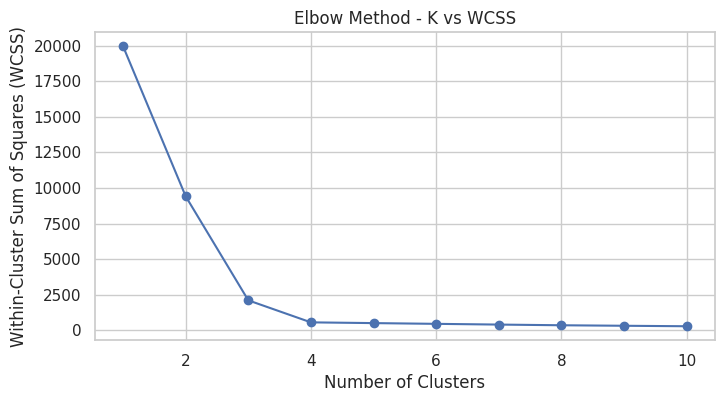

Silhouette Score for K=4: 0.792


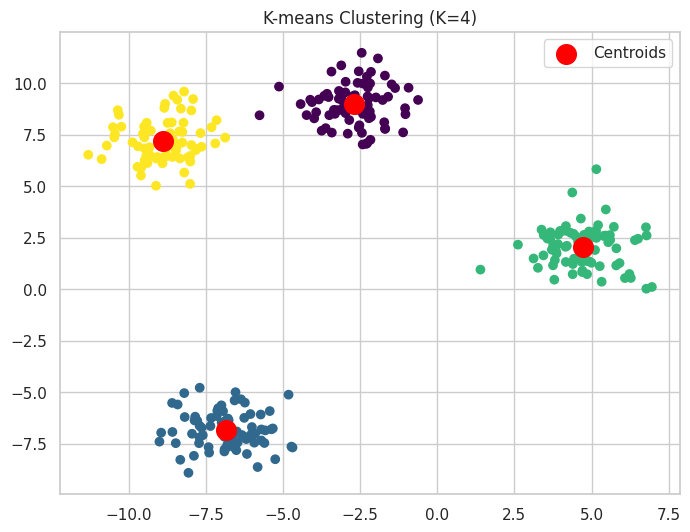

In [ ]:

# Generate clustering data
X_kmeans, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_kmeans)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method - K vs WCSS")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

# Silhouette score at K = 4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_kmeans)
sil_score = silhouette_score(X_kmeans, labels)
print(f"Silhouette Score for K=4: {sil_score:.3f}")

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("K-means Clustering (K=4)")
plt.legend()
plt.show()



## Principal Component Analysis (PCA) – Variance Explained Plot

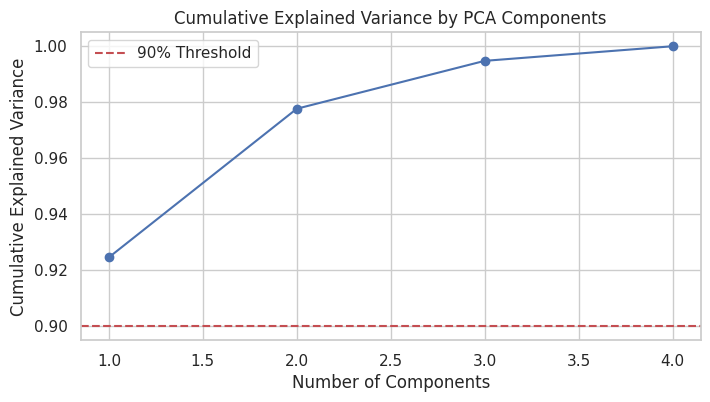

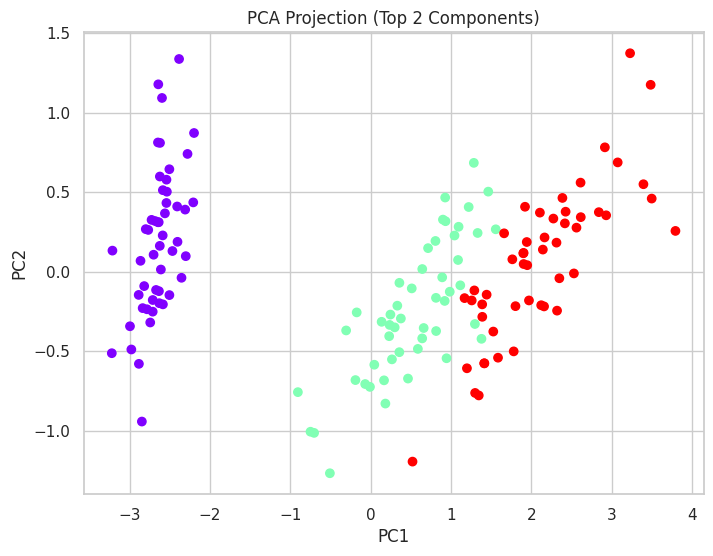

In [ ]:
# Load dataset
iris = load_iris()
X_pca = iris.data

# Fit PCA
pca = PCA()
X_transformed = pca.fit_transform(X_pca)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.show()

# Visualize top 2 PCs
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=iris.target, cmap='rainbow')
plt.title("PCA Projection (Top 2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### Synopsis of Tuning Perspectives

 - **LASSO**: To minimise error and ensure sparsity, the optimal alpha is chosen by cross-validation.
 - **K-means**: K=4 is a good clustering structure according to silhouette analysis and the elbow approach.
 - **PCA**: Supporting dimensionality reduction, the first two to three components maintain over 90% of variance.